### Points Visualization

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder


In [44]:
class StatsComp:
    def __init__(self, training_data, labels):
        self.training_data = training_data
        self.labels = labels

    def extract(self):
        attributes = self.training_data.groupby('PlayerID').apply(lambda x: self.aggregate(x)).values
        target_labels = self.labels['pts'].values
        return attributes, target_labels

    def aggregate(self, player_data):
        latest_age = player_data.age.values[-1]
        average_games_played = np.mean(player_data.gp.values)
        average_points = np.mean(player_data.pts.values)
        points_last_year = player_data.pts.values[-1]
        points_year_before_last = player_data.pts.values[-2]
        average_net_rating = np.mean(player_data.net_rating.values)
        average_true_shooting = np.mean(player_data.ts_pct.values)
        average_usage_rate = np.mean(player_data.usg_pct.values)

        aggregated_data = np.array([
            [latest_age, average_games_played, average_points, points_last_year,
             points_year_before_last, average_net_rating, average_true_shooting,
             average_usage_rate]
        ])

        '''
        team_abbreviation_encoded = self.encode_categorical(player_data.team_abbreviation)
        college_encoded = self.encode_categorical(player_data.college)
        country_encoded = self.encode_categorical(player_data.country)

        
        # Combine all features into a single flattened array
        numeric_data = np.array([latest_age, average_games_played, average_points, points_last_year,
                         points_year_before_last, average_net_rating, average_true_shooting,
                         average_usage_rate])[np.newaxis, :]

        # Ensure each encoded array is 2D with one row. If they are not, reshape them:
        team_abbreviation_encoded = team_abbreviation_encoded.reshape(1, -1)
        college_encoded = college_encoded.reshape(1, -1)
        country_encoded = country_encoded.reshape(1, -1)

        # Now concatenate all features along the second axis (axis=1 for horizontal concatenation)
        aggregated_data = np.concatenate(
            [numeric_data, team_abbreviation_encoded, college_encoded, country_encoded], axis=1
        )
        '''

        return pd.DataFrame(aggregated_data)
    
    '''
    def encode_categorical(self, column):
        # This function can be called to perform one-hot encoding on the column
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoded = encoder.fit_transform(column.values.reshape(-1, 1)).toarray()
        return encoded
    '''

In [36]:
class Utility:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def split_attributes_labels(self):
        attributes = self.dataframe.groupby('PlayerID').apply(lambda x: x.iloc[:-1]).reset_index(drop=True)
        labels = self.dataframe.groupby('PlayerID').apply(lambda x: x.iloc[-1]).reset_index(drop=True)
        return attributes, labels

    @staticmethod
    def split_train_test(attributes, labels, test_size=0.2, random_state=42):
        X_train, X_test, y_train, y_test = train_test_split(attributes, labels, test_size=test_size, random_state=random_state)
        return X_train, X_test, y_train, y_test


/Users/bryantchung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/bryantchung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/bryantchung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


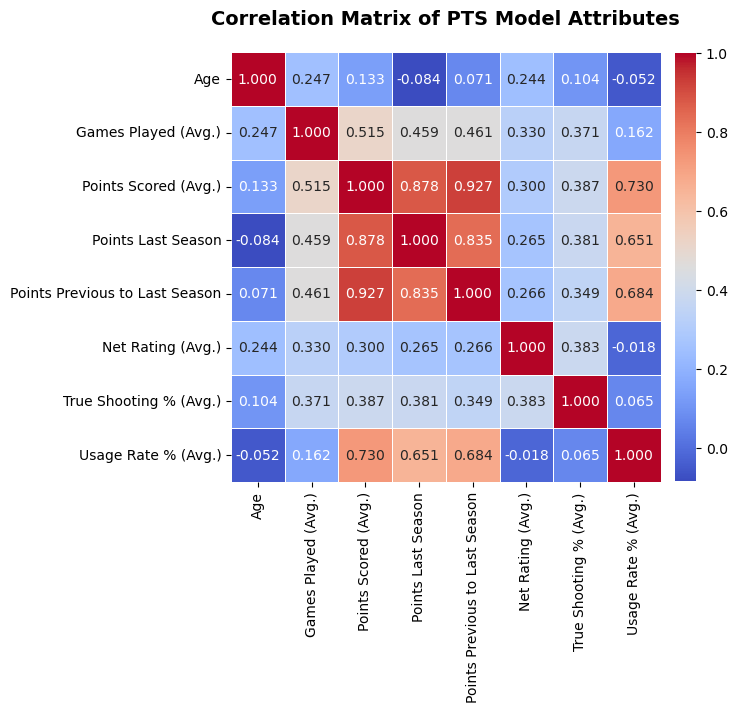

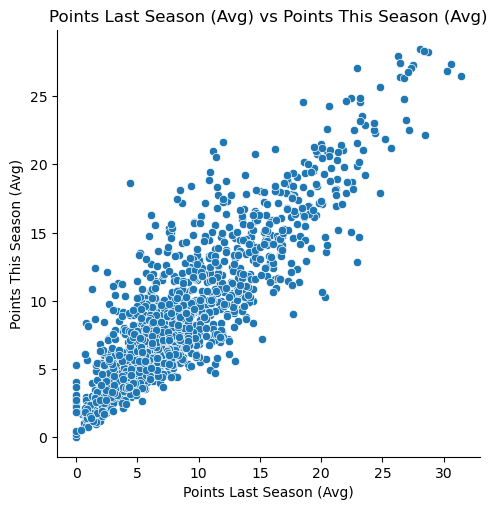

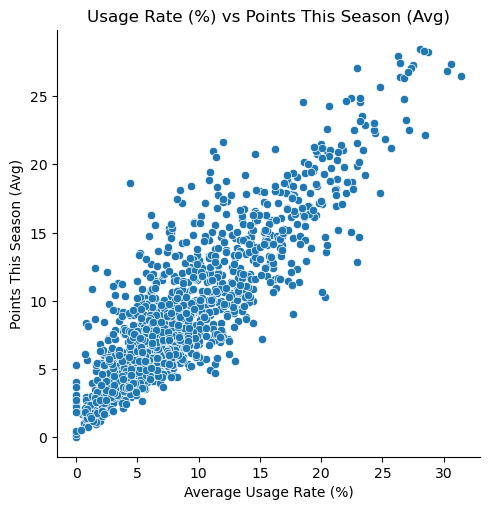

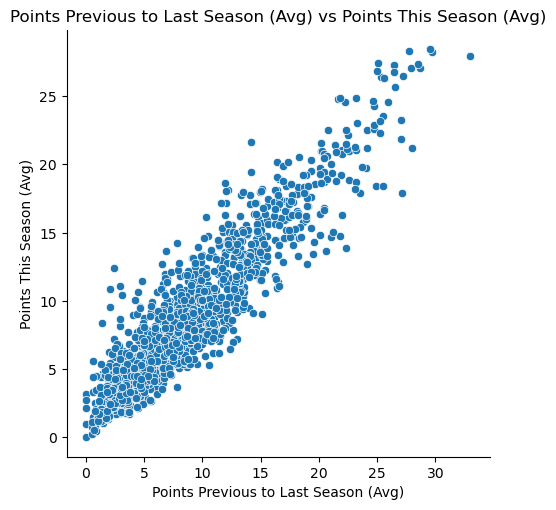

In [47]:
# load data
df_data = pd.read_csv('dataset/training_dataset_PlayerID.csv')

# data preprocessor with loaded dataframe
data_preprocessor = Utility(df_data)

# split 
df_xtrain, df_label = data_preprocessor.split_attributes_labels()

stats = StatsComp(training_data=df_xtrain, labels=df_label)

attribute_pts, label_pts = stats.extract()

# Correlation visualization of pts model input attributes
datacor = np.corrcoef(attribute_pts.T)  # transpose ensures attributes are columns, datacor uses correlation coefficients between variables

attributes_names = [
    'Age', 
    'Games Played (Avg.)', 
    'Points Scored (Avg.)', 
    'Points Last Season', 
    'Points Previous to Last Season', 
    'Net Rating (Avg.)', 
    'True Shooting % (Avg.)', 
    'Usage Rate % (Avg.)',
]

datacor = pd.DataFrame(data=datacor, columns=attributes_names, index=attributes_names)
plt.figure(figsize=(6,6))
ax = sns.heatmap(data=datacor, annot=True, fmt='.3f', cmap='coolwarm', square=True, linewidths=.5, cbar_kws={'fraction': 0.046, 'pad': 0.03})
plt.title('Correlation Matrix of PTS Model Attributes', fontsize=14, fontweight='bold', pad=20)
plt.savefig("pts_model_correlation_matrix.png", dpi=300, bbox_inches='tight')

#scatter plots using the actual values

attributes_df = pd.DataFrame(attribute_pts, columns=attributes_names)

# Scatter plot for Points Last Season vs Points This Season using relplot
sns.relplot(data=attributes_df, x='Points Last Season', y='Points Scored (Avg.)', kind="scatter")
plt.title('Points Last Season (Avg) vs Points This Season (Avg)')
plt.xlabel('Points Last Season (Avg)')
plt.ylabel('Points This Season (Avg)')

# Scatter plot for Usage Rate vs Points This Season using relplot
sns.relplot(data=attributes_df, x='Points Last Season', y='Points Scored (Avg.)', kind="scatter")
plt.title('Usage Rate (%) vs Points This Season (Avg)')
plt.xlabel('Average Usage Rate (%)')
plt.ylabel('Points This Season (Avg)')

# Scatter plot for Usage Rate vs Points This Season using relplot
sns.relplot(data=attributes_df, x='Points Previous to Last Season', y='Points Scored (Avg.)', kind="scatter")
plt.title('Points Previous to Last Season (Avg) vs Points This Season (Avg)')
plt.xlabel('Points Previous to Last Season (Avg)')
plt.ylabel('Points This Season (Avg)')

plt.show()


